<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-аномалий" data-toc-modified-id="Изучение-аномалий-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение аномалий</a></span></li><li><span><a href="#Анализ-корреляций" data-toc-modified-id="Анализ-корреляций-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ корреляций</a></span></li><li><span><a href="#Анализ-портрета-пользователя" data-toc-modified-id="Анализ-портрета-пользователя-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ портрета пользователя</a></span></li><li><span><a href="#Анализ-популярности-платформ-по-регионам" data-toc-modified-id="Анализ-популярности-платформ-по-регионам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ популярности платформ по регионам</a></span></li><li><span><a href="#Анализ-популярности-жанров-по-регионам" data-toc-modified-id="Анализ-популярности-жанров-по-регионам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Анализ популярности жанров по регионам</a></span></li><li><span><a href="#Анализ-влияния-рейтинга-ESRB-на-продажи" data-toc-modified-id="Анализ-влияния-рейтинга-ESRB-на-продажи-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Анализ влияния рейтинга ESRB на продажи</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ продаж консольных и компьютерных игр с 1980 года #

**Введение**

У нас есть данные о продажах игр с 1980 года, оценки пользователей и экспертов, жанры и платформы. 


Задачи: 


- Исследовать и подготовить данные для анализа;


- Изучить рынок и дать прогноз по самым перспективным платформам на будущий год;


- Изучить популярные платформы и жанры в разных регионах;


- Проанализировать влияние оценок пользователей и критиков на продажи;


- Оценить влияние рейтинга на продажи;


- Проверить две гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [1]:
#загрузим все необходимые для проекта библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#создадим переменную с датасетом и выведем первые 10 строк

df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Шпаргалка по названиям столбцов:


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг - - - - компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных ##

In [3]:
#изучим информацию о датасете

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#посмотрим статистические параментры с помозью метода describe()


df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- Всего в датасете 16715 строк. 


- Многие типы данных столбцов указаны неправильно. Например, данные столбца Year_of_Release, в котором указан год, имеют вещественный тип. 


- Много пропусков в колонках Critic_Score, User_Score, Rating. 


- Есть пропуски в столбцах Name, Genre, Year_of_Release, однако их число незначительно. 


- В столбцах продаж есть строки с нулевым значением.

## Подготовка данных ##

In [5]:
#приведем названия столбцов к нижнему регистру и выведем результат на экран

df = df.rename(columns={
    'Name':'name','Platform':'platform', 
    'Year_of_Release':'year_of_release', 
    'Genre':'genre', 
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
}) 

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
#заменим тип данных столбца year_of_release на Int, потому что год не является вещественным значением

df['year_of_release'] = df['year_of_release'].astype('Int64')

#заменим тип данных столбца user_score на float, так как строковый тип данных не подходит для этого столбца
#при замене типа данных user_score возникает ошибка "could not convert string to float: 'tbd'", поэтому заменим это значение на NaN

df['user_score'] = df['user_score'].replace('tbd', 'NaN') 

df['user_score'] = df['user_score'].astype('float')

In [7]:
#выведем среднее значение наличия пропусков в каждом столбце 


pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


Больше всего пропусков в столбце сritic_score. Также много пропусков в столбцах user_Score и rating

In [8]:
#удалим строки с пропусками в year_of_release и genre, так как их объем незначительный

df = df.dropna(subset=['year_of_release']) 

df = df.dropna(subset=['genre'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


- В столбцах year_of_release и genre мы удалили строки с пропускам, потому что их количество было незначительным.


- В столбцах с наибольшим числом пропусков - critic_score, user_score и rating - мы не стали заполнять пропуски или удалять их. Оценки и рейтинг носят индивидуальный по отношению к каждой игре характер, а если мы удалим строки, то потеряем 50% данных исходного датасета.


In [9]:
#проверим датасет на дубликаты

df.duplicated().sum()

0

In [10]:
#изучим строки с пропусками в значениям столбца rating

df[df['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [11]:
#заменим строки с пропусками в значениям столбца rating на значение "no_rating"

In [12]:
df['rating'] = df['rating'].fillna('no_rating')

In [13]:
#изучим строки с пропусками в значениям столбца user_score

df[df['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,no_rating
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,no_rating
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,no_rating
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,no_rating
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,no_rating
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,no_rating


**Возможные причины пропусков:**

1. Данные оценок критиков и пользователей могли быть утеряны при сборе данных. Также игра могла не получить оценок критиков и игроков, если пользовалась низким спросом.
 
 
2. Данные рейтинга могут отсутствовать из-за того, что были утеряны. Кроме того, требования по присваиванию рейтинга могут отличаться от региона к региону.

In [14]:
#создадим столбец sales_total и посчитаем в нем сумму na_sales, eu_sales, jp_sales и other_sales.

df['sales_total'] = df['na_sales'] + df['eu_sales'] +  df['jp_sales'] + df['other_sales']

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


## Исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


<AxesSubplot:title={'center':'Объем выпуска игр по годам'}, xlabel='year_of_release'>

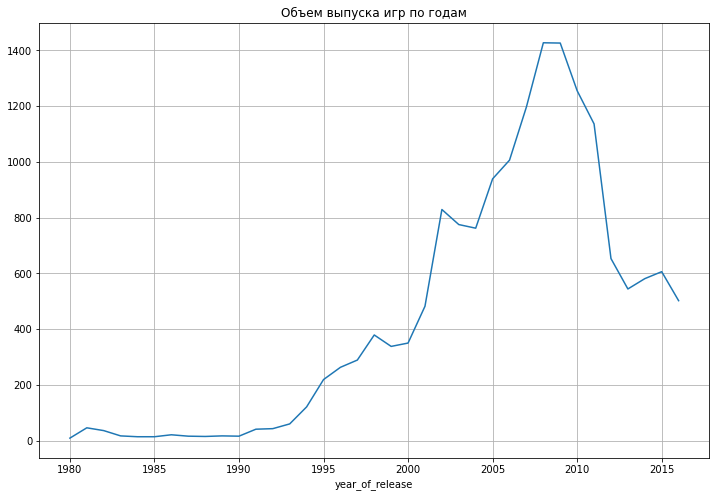

In [15]:
#посмтроим график объема выпуска игр по годам

df_years = df.groupby('year_of_release')['name'].count()
df_years.plot(grid=True, figsize=(12,8), title='Объем выпуска игр по годам')

До 1990 года объем выпуска игр был стабильно низким. После 1990 года - пошел в рост и достиг пика в 2007 году. В 2008 году показатель стал падать - предположительно, по причне мирового финансового кризиса. 

In [16]:
#перезапишем датафрейм, включив в него данные с 1990го, после которого начался рост выпуска игр

df_1990 = df.query('year_of_release >= 1990')


<AxesSubplot:title={'center':'Продажи платформ с 1990 года'}, xlabel='platform'>

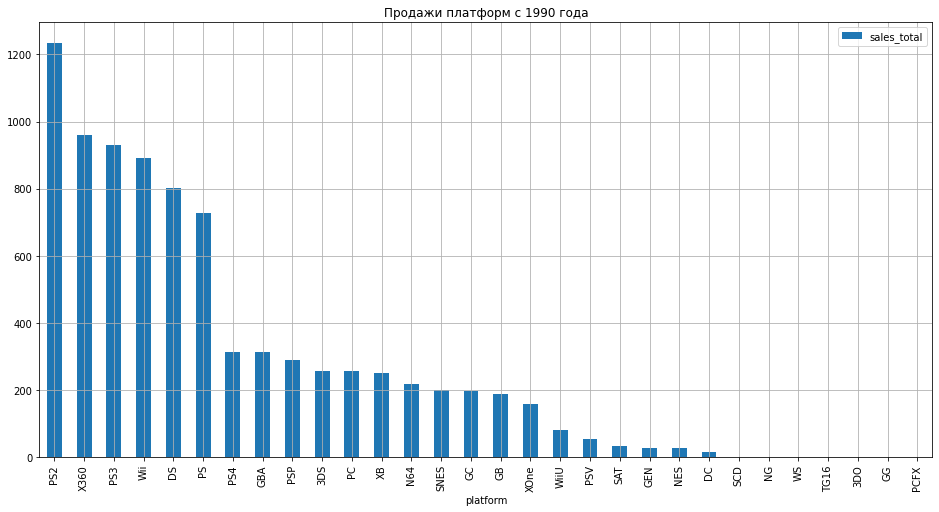

In [17]:
#выведем диаграмму платформ по суммарным продажам с 1990 года


df_platform = df_1990.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False)


df_platform.plot(kind='bar', grid=True, figsize=(16,8), title='Продажи платформ с 1990 года')

<AxesSubplot:xlabel='year_of_release'>

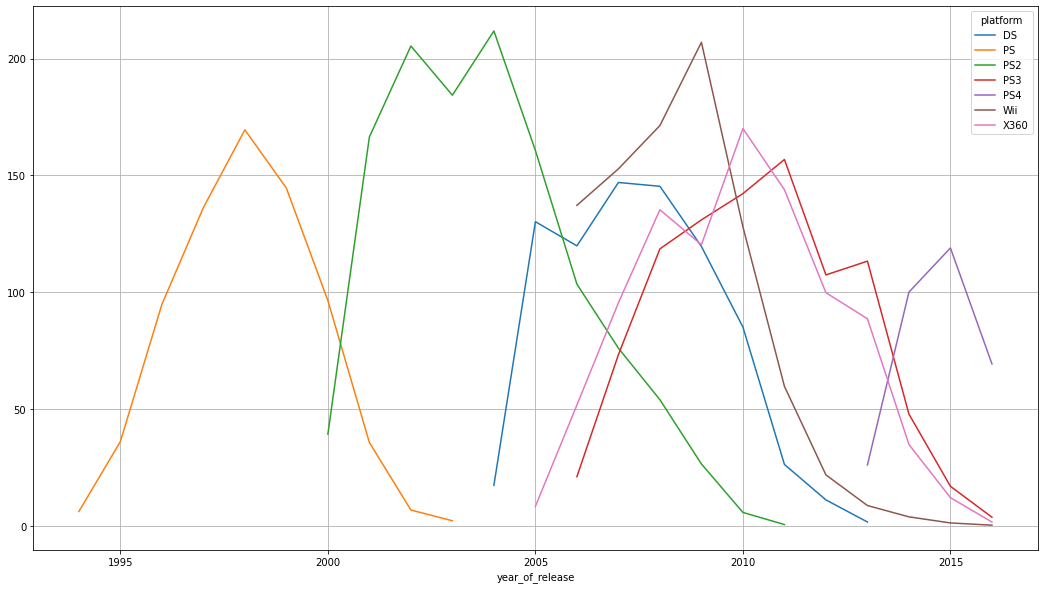

In [18]:
#построим график для топ-7 платформ по продажам за период с 1990 года


top_plat = df_1990.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(7).index
df_1990.query(
    'platform in @top_plat').pivot_table(index='year_of_release', columns = 'platform', values ='sales_total', aggfunc='sum').plot(grid=True, figsize=(18,10))  

Как мы видим на графике, средний цикл жизни платформы составляет 10-15 лет. 

**Прогноз продаж на 2017 год**

Чтобы строить прогноз на сл.год, нужно рассматривать данные только за несколько лет.  Поэтому, чтобы построить прогноз на 2017 год, возьмем данные с 2013 года - старта продаж перспективных платформ нового поколения PS4 и XOne.

<AxesSubplot:xlabel='year_of_release'>

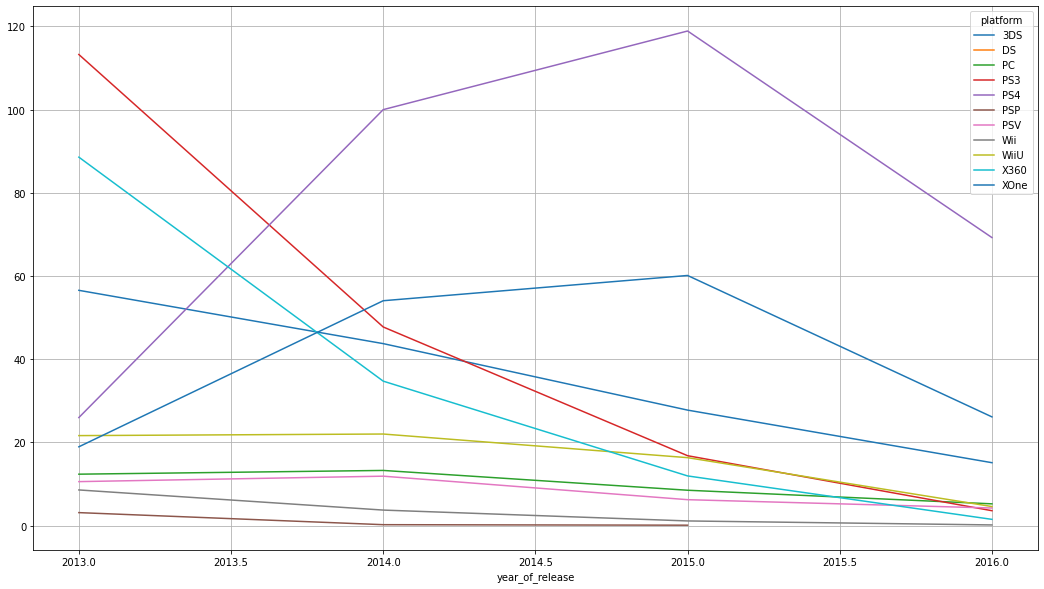

In [19]:
#построим график продаж платформ с 2013 года

df_2013 = df.query('year_of_release >= 2013')

top_plat = df_2013.groupby('platform')['sales_total'].sum().sort_values(ascending=False).index
df_2013.query(
    'platform in @top_plat').pivot_table(index='year_of_release', columns = 'platform', values ='sales_total', aggfunc='sum').plot(grid=True, figsize=(18,10))  

Прогноз: самыми прибыльными платформами в 2017 году вероятнее всего станут PS4 и XOne. Продажи игр на эти платформы стартовали в 2013 году - т.е. в 2015 году они находились в самом начали цикла своего развитития, -  и по результатам 2016 года они стали самими прибыльными. 

Также, несмотря на нисходящий тренд, сохраняет потенциал платформа 3DS. По результатам 2016 года она заняла третье место по продажам.
***

### Изучение аномалий


<AxesSubplot:title={'center':'sales_total'}, xlabel='platform'>

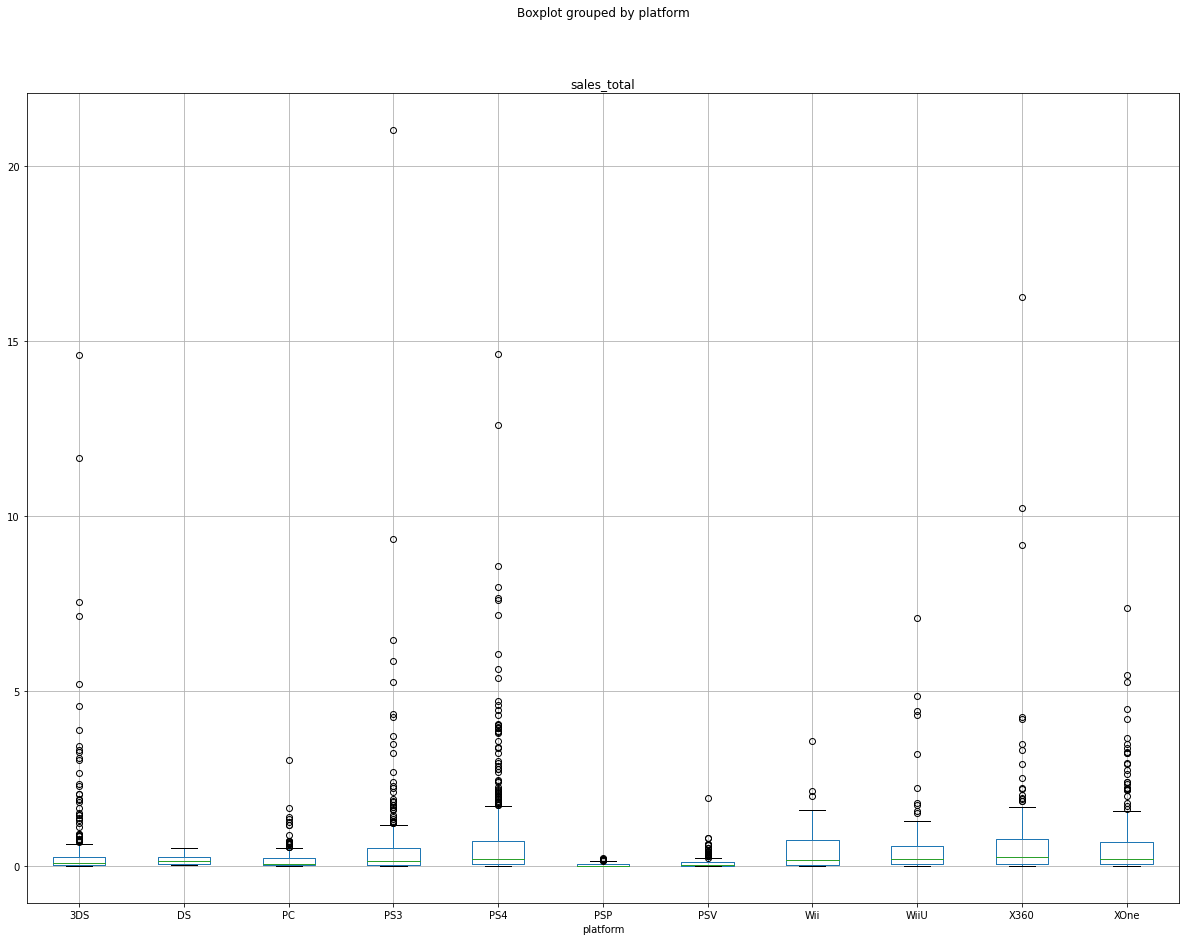

In [20]:
#посмтроим диаграммы размаха для всех платформ за период с 2013 года

df_platforms_sales = df_2013[['platform', 'sales_total']]

df_platforms_sales.boxplot('sales_total', by='platform', figsize=(20,15))

(0.0, 2.0)

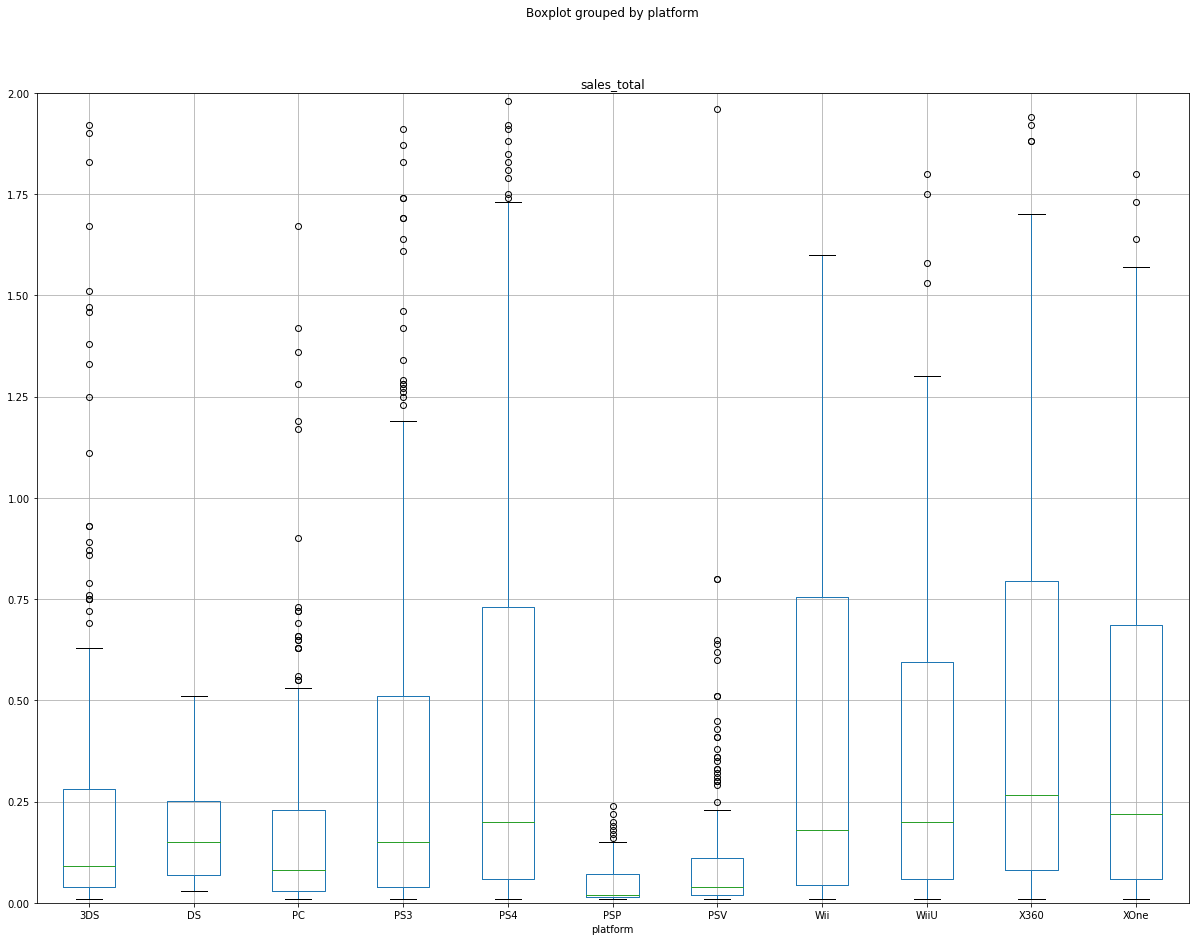

In [21]:
#посмтроим еще один график, ограничив ось y показателем значением 2, чтобы посмотреть на график без выбросов

df_platforms_sales = df_2013[['platform', 'sales_total']]

df_platforms_sales.boxplot('sales_total', by='platform', figsize=(20,15))
plt.ylim([0,2])

In [22]:
#изучим выбросы платформ, сделав срез по объемам продаж выше 10 млн копий

df_2013.query('sales_total > 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


Мы видим, что выбросы значений в sales_total - это просто суперуспешные релизы. По этой причине удалять их нельзя.

- На диаграмме "ящик с усами" мы видим большое количество выбросов. Это игры-хиты, которые собрали наибольшее кол-во продаж. 


- По медианному показателю продаж лидирует платформа X360. 


- По общей длине "ящика с усами", т.е. по общему распределению продаж, лидирует платформа PS4. У платформы много и высокоприбыльных игр, и игр, которые отличаются средними продажами. Другие наиболее успешные платформы по распределению продаж - X360, XOne, PS3, Wii и WiiU.


- Наименее успешна - платформа PSP. Это связано с тем, что она находится в конце своего жизненного цикла и с 2013 года на нее выпустили мало игр. 


### Анализ корреляций 

In [23]:
#найдем самую популярную платформу по общим продажам с 2013 года

df_2013_top = df_2013.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(1)
df_2013_top 

platform
PS4    314.14
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='critic_score', ylabel='sales_total'>

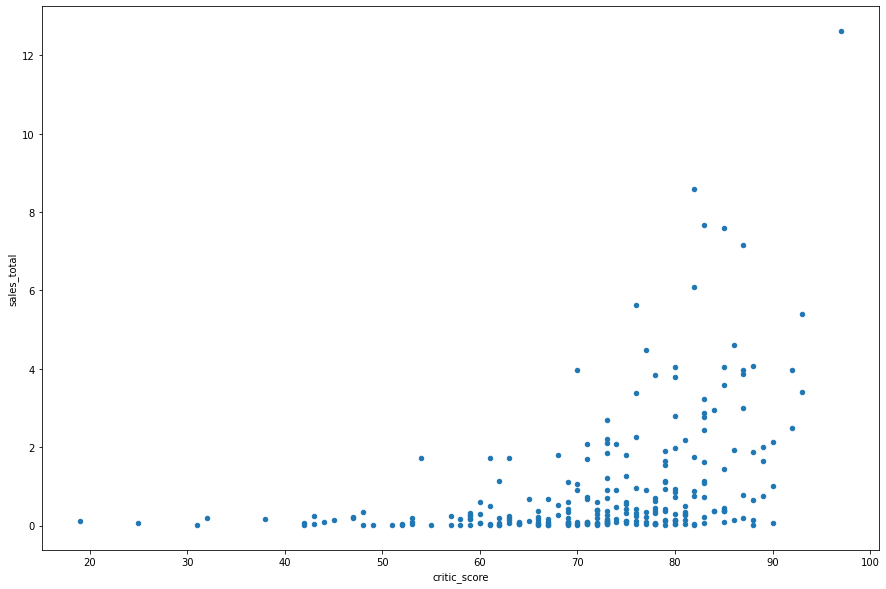

In [24]:
#посмтроим диаграмму рассеяния оценки критиков и продаж для платформы PS4.


df_critic_ps4 = df_2013.query('platform == "PS4"')

df_critic_ps4.plot(x='critic_score', y='sales_total', kind='scatter', figsize=(15,10))



In [25]:
#рассчитаем показатель корреляции для показателей оценок критиков и показателей продаж

df_critic_ps4['critic_score'].corr(df_critic_ps4['sales_total'])

0.40656790206178095

Корреляция показателей ниже среднего, однако на диаграмме видно, что игры с самыми высокими оченками критиков имеют также высокие показатели продаж.  

<AxesSubplot:xlabel='user_score', ylabel='sales_total'>

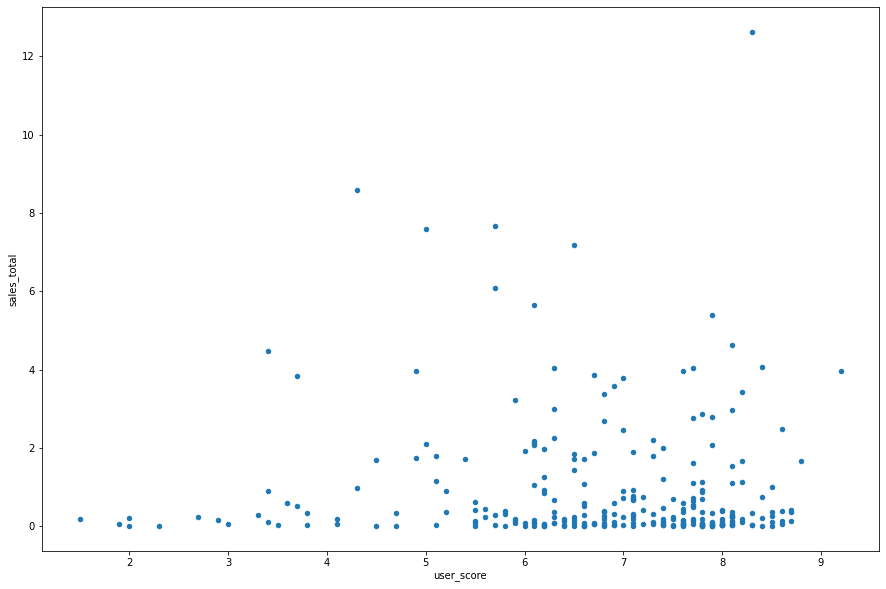

In [26]:
#посмотроим диаграмму рассеяния для пользовательских оценок и продаж игр на платформу PS4

df_user_ps4 = df_2013.query('platform == "PS4"')

df_user_ps4.plot(x='user_score', y='sales_total', kind='scatter', figsize=(15,10))

In [27]:
df_user_ps4['user_score'].corr(df_user_ps4['sales_total'])

-0.031957110204556376

Корреляции продаж игр и пользовательских оценок на платформе PS4 нет.

In [28]:
#посчитаем корреляцию между оценками пользователей и критиков и продажами по всему датафрейму за акмуальный период
#напишем цикл, который рассчитывает корреляцию между  оценками критиков и продажи для каждой платформы


df_2013_critic=df_2013.query('critic_score > 0')



for n in df_2013_critic['platform'].unique():
    query = df_2013_critic.query('platform == @n')
    corr_critic = query['critic_score'].corr(query['sales_total'])
    print('Корреляция оценки критиков и продаж игр платформы', n, '-', corr_critic.round(2))
    


#df_critic_corr = df_2013['critic_score'].corr(df_2013['sales_total'])
#df_user_corr = df_2013['user_score'].corr(df_2013['sales_total'])

#print('Корреляция продаж и оценки критиков:', df_critic_corr)
#print('Корреляция продаж и оценки пользователей:', df_user_corr)


Корреляция оценки критиков и продаж игр платформы PS3 - 0.33
Корреляция оценки критиков и продаж игр платформы X360 - 0.35
Корреляция оценки критиков и продаж игр платформы PS4 - 0.41
Корреляция оценки критиков и продаж игр платформы WiiU - 0.38
Корреляция оценки критиков и продаж игр платформы XOne - 0.42
Корреляция оценки критиков и продаж игр платформы 3DS - 0.36
Корреляция оценки критиков и продаж игр платформы PC - 0.2
Корреляция оценки критиков и продаж игр платформы PSV - 0.25
Корреляция оценки критиков и продаж игр платформы PSP - nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [29]:
#посмотроим строки с играми PSP, так как цикл не сработал с этой платформой

df_2013_critic_PSP=df_2013_critic.query('platform == "PSP"')

df_2013_critic_PSP

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
8969,Summon Night 5,PSP,2013,Role-Playing,0.0,0.0,0.15,0.0,74.0,8.3,T,0.15


Корреляции у показателей оценки критиков и продаж почти нет и она находится на уровне ниже среднего. 

Отсутствие значения у PSP связано с тем, что в датафрейме представлена только одна игра на эту платформу.

In [30]:
#с помощью цикла рассчитаем корреляцию между пользовательскими оценками и продажами 

df_2013_user=df_2013.query('user_score > 0')



for n in df_2013_user['platform'].unique():
    query = df_2013_user.query('platform == @n')
    corr_user = query['user_score'].corr(query['sales_total'])
    print('Корреляция пользовательских оценок и продаж игр платформы', n, '-', corr_user.round(2))



Корреляция пользовательских оценок и продаж игр платформы PS3 - 0.0
Корреляция пользовательских оценок и продаж игр платформы X360 - -0.01
Корреляция пользовательских оценок и продаж игр платформы PS4 - -0.03
Корреляция пользовательских оценок и продаж игр платформы WiiU - 0.42
Корреляция пользовательских оценок и продаж игр платформы XOne - -0.07
Корреляция пользовательских оценок и продаж игр платформы 3DS - 0.24
Корреляция пользовательских оценок и продаж игр платформы Wii - 0.68
Корреляция пользовательских оценок и продаж игр платформы PC - -0.09
Корреляция пользовательских оценок и продаж игр платформы PSV - 0.0
Корреляция пользовательских оценок и продаж игр платформы DS - nan
Корреляция пользовательских оценок и продаж игр платформы PSP - -1.0


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
#проверим строки с играми PSP, так как у платформы аномально высокий показатель отрицательной корреляции

df_2013_user_PSP = df_2013_user.query('platform == "PSP"')

df_2013_user_PSP

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
7875,FIFA 14,PSP,2013,Sports,0.0,0.15,0.00,0.04,NaN,3.4,E,0.19
8969,Summon Night 5,PSP,2013,Role-Playing,0.0,0.00,0.15,0.00,74.0,8.3,T,0.15


Корреляции пользовательских оценок и продаж у разных платформ нет. 


Аномальный показатель корреляции у PSP связан с тем, что у этой платформы в датафрейме представлено всего 2 игры. Делать выводы на основании такого небольшого объема данных нельзя.  

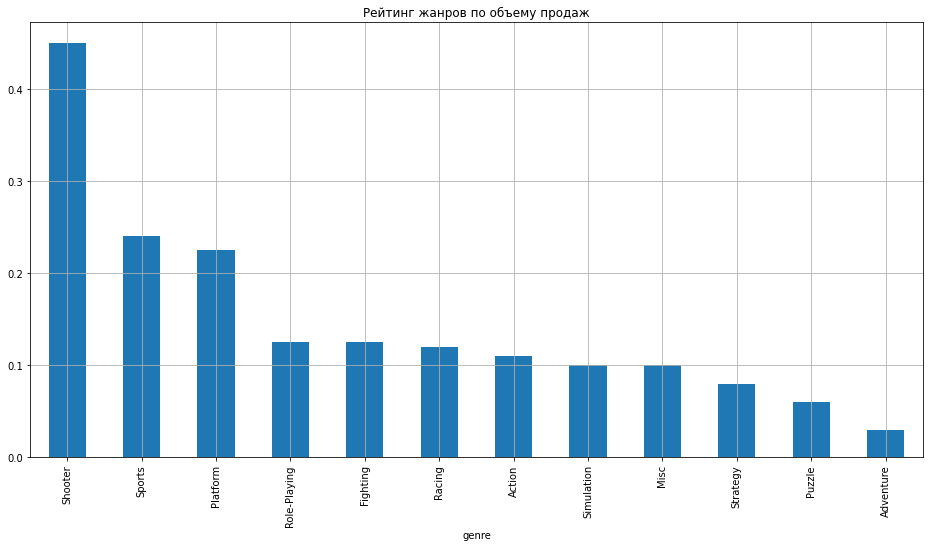

In [32]:
#посмотроим гистрограмму по самым продаваемым жанрам за актуальный период


df_genre = df_2013.groupby('genre')['sales_total'].median().sort_values(
    ascending=False).plot(kind='bar', 
    grid=True, figsize=(16,8), 
    title='Рейтинг жанров по объему продаж')


Самыми продаваемыеми жанрами по медианному доходу с 2013 года являются Shooter, Sports и Platform. Наименее продаваемыми по медиане: Strategy, Puzzle и Adventure.

###  Анализ портрета пользователя

### Анализ популярности платформ по регионам

,na_sales,share_%
platform,,
PS4,108.74,24.8
XOne,93.12,21.3
X360,81.66,18.7
PS3,63.50,14.5
3DS,38.20,8.7


AxesSubplot(0.135,0.125;0.755x0.755)


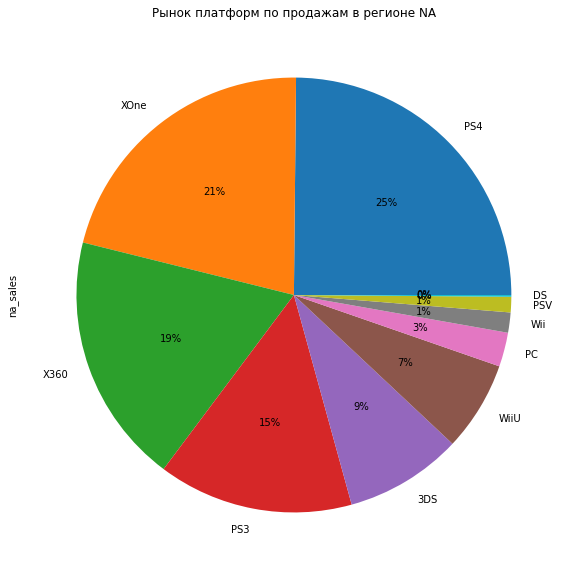

In [33]:
#сгруппируем данные по продажам каждой платформы в регионе NA с 2013 года, выведем на экран топ-5 платформ по продажам
#рассчитаем долю продаж от общего показателя продаж региона, добавим в датафрейм соответствующий столбец

df_na = df_2013.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
df_na['share_%'] = (df_na['na_sales'] / df_2013['na_sales'].sum() * 100).round(1)



display(df_na.head())

print(df_na['na_sales'].plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', title='Рынок платформ по продажам в регионе NA'))
                             
                             
                             

Самой популярной платформой в регионе NA является PS4. По данным продаж в этом регионе с 2013 года, ее рыночная доля составляет 24,8%.

Второй по популярности платформой является XOne. Ее доля - 21,3%. 

Далее идут X360, PS3 и 3DS.

,eu_sales,share_%
platform,,
PS4,141.09,36.0
PS3,67.81,17.3
XOne,51.59,13.2
X360,42.52,10.8
3DS,30.96,7.9


AxesSubplot(0.135,0.125;0.755x0.755)


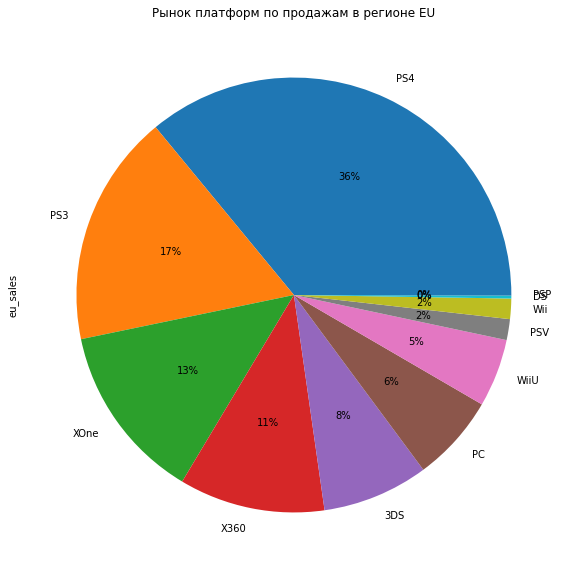

In [34]:
#рассчитаем топ-5 платформ и долю их продаж для региона EU

df_eu = df_2013.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
df_eu['share_%'] = (df_eu['eu_sales'] / df_2013['eu_sales'].sum() * 100).round(1)
df_eu = df_eu.query('eu_sales > 0')

display(df_eu.head())
print(df_eu['eu_sales'].plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', title='Рынок платформ по продажам в регионе EU'))




Самой популярной платформой в регионе EU является PS4. По данным продаж в этом регионе с 2013 года, ее рыночная доля составляет 36%.

Второй по популярности платформой является PS3. Ее доля - 17,3%. 

Далее идут XOne, X360 и 3DS.

,jp_sales,share_%
platform,,
3DS,67.81,48.2
PS3,23.35,16.6
PSV,18.59,13.2
PS4,15.96,11.3
WiiU,10.88,7.7


AxesSubplot(0.135,0.125;0.755x0.755)


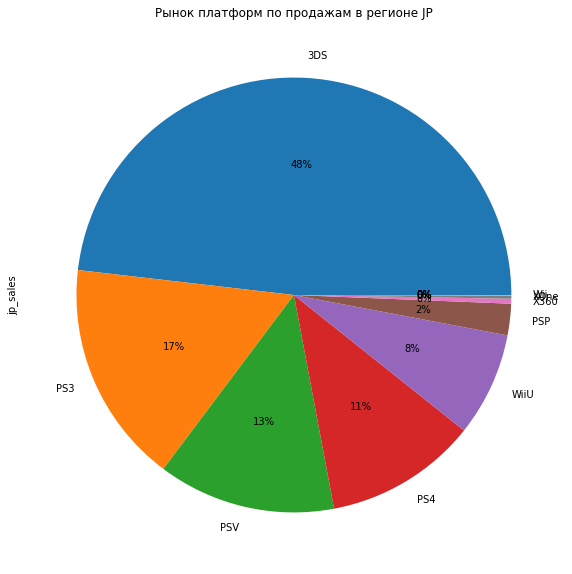

In [35]:
#рассчитаем топ-5 платформ и долю их продаж для региона  JP

df_jp = df_2013.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
df_jp['share_%'] = (df_jp['jp_sales'] / df_2013['jp_sales'].sum() * 100).round(1)

display(df_jp.head())
print(df_jp['jp_sales'].plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', title='Рынок платформ по продажам в регионе JP'))


Самой популярной платформой в регионе JP является 3DS. По данным продаж в этом регионе с 2013 года, ее рыночная доля составляет 48,2%.

Второй по популярности платформой является PS3. Ее доля - 16,6%. 

Далее идут PSV, PS4 и WiiU.

Text(0.5, 1.0, 'Регион JP')

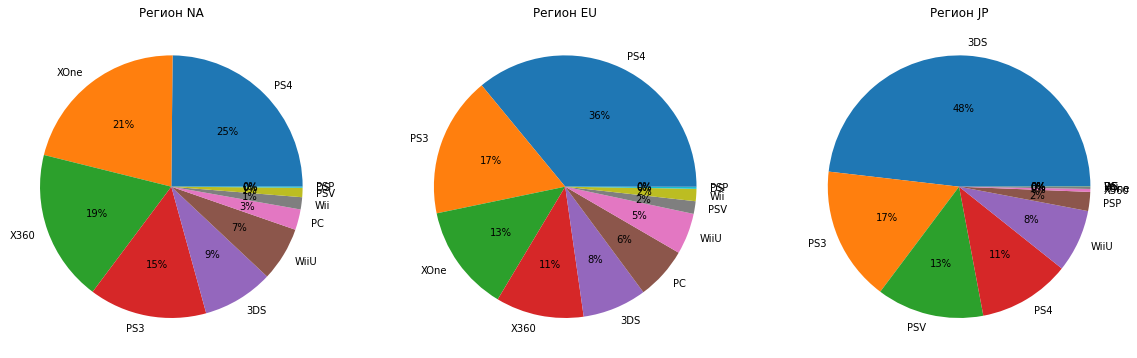

In [36]:
#воспользуемся методом sublots и выведем графики в одной строке для сравнения


fig, ax = plt.subplots(1,3, figsize=(20,20))

ax[0].pie(df_na['na_sales'], autopct='%1.0f%%', labels=df_na.index)
ax[0].set_title('Регион NA')

ax[1].pie(df_eu['eu_sales'], autopct='%1.0f%%', labels=df_eu.index)
ax[1].set_title('Регион EU')

ax[2].pie(df_jp['jp_sales'], autopct='%1.0f%%', labels=df_jp.index)
ax[2].set_title('Регион JP')

Рыночная конъюнктура регионов NA и EU схожа, рынок платформ региона JP отличается от них. В Японии очень популярны портативные игровые системы 3DS и PSP. Вместе они занимают 61% рынка этого региона.

### Анализ популярности жанров по регионам

,na_sales,share_%
genre,,
Action,126.05,28.8
Shooter,109.74,25.1
Sports,65.27,14.9
Role-Playing,46.40,10.6
Misc,27.49,6.3


AxesSubplot(0.135,0.125;0.755x0.755)


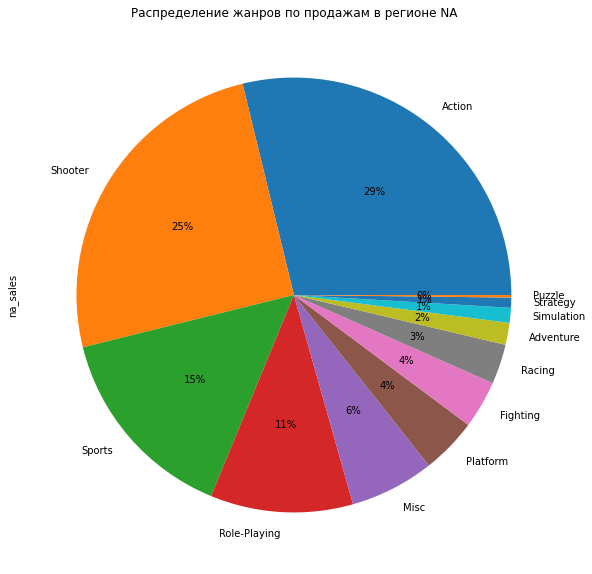

In [37]:
#рассчитаем топ-5 жанров и долю их продаж для региона NA

df_na_genre = df_2013.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
df_na_genre['share_%'] = (df_na_genre['na_sales'] / df_2013['na_sales'].sum() * 100).round(1)

display(df_na_genre.head())
print(df_na_genre['na_sales'].plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', title='Распределение жанров по продажам в регионе NA'))

Самым популярным жанром в регионе NA является Action. По данным продаж в этом регионе с 2013 года, его рыночная доля составляет 28,8%.

Вторым по популярности жанром является Shooter. Его доля - 25,1%. 

Далее идут Sports, Role-Playing и Misc.

,eu_sales,share_%
genre,,
Action,118.13,30.1
Shooter,87.86,22.4
Sports,60.52,15.4
Role-Playing,36.97,9.4
Racing,20.19,5.1


AxesSubplot(0.135,0.125;0.755x0.755)


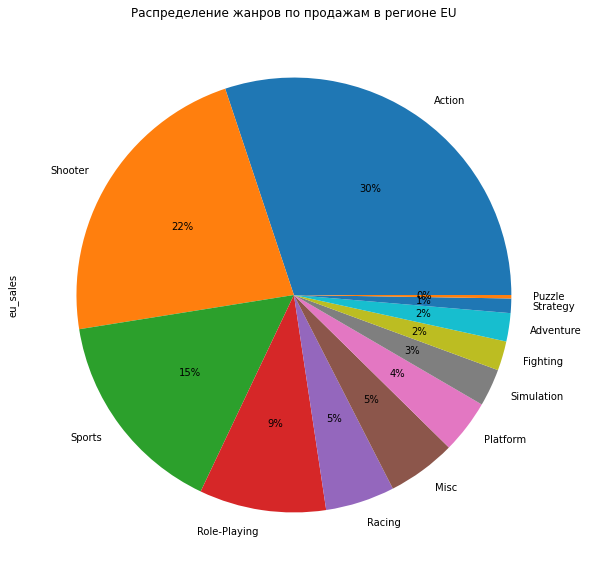

In [38]:
#рассчитаем топ-5 жанров и долю их продаж для региона EU

df_eu_genre = df_2013.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
df_eu_genre['share_%'] = (df_eu_genre['eu_sales'] / df_2013['eu_sales'].sum() * 100).round(1)

display(df_eu_genre.head())
print(df_eu_genre['eu_sales'].plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', title='Распределение жанров по продажам в регионе EU'))


Самым популярным жанром в регионе EU является Action. По данным продаж в этом регионе с 2013 года, его рыночная доля составляет 30,1%.

Вторым по популярности жанром является Shooter. Его доля - 22,4%. 

Далее идут Sports, Role-Playing и Racing.

,jp_sales,share_%
genre,,
Role-Playing,51.04,36.3
Action,40.49,28.8
Misc,9.20,6.5
Fighting,7.65,5.4
Shooter,6.61,4.7


AxesSubplot(0.135,0.125;0.755x0.755)


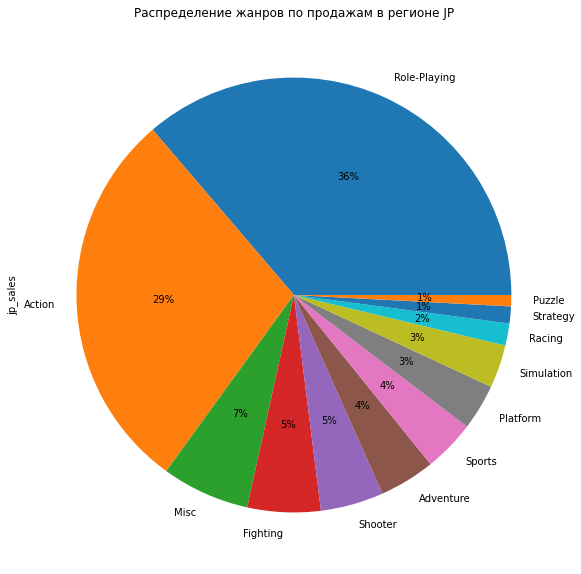

In [39]:
#рассчитаем топ-5 жанров и долю их продаж для региона JP


df_jp_genre = df_2013.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
df_jp_genre['share_%'] = (df_jp_genre['jp_sales'] / df_2013['jp_sales'].sum() * 100).round(1)

display(df_jp_genre.head())
print(df_jp_genre['jp_sales'].plot(kind='pie', figsize=(10,10), autopct='%1.0f%%', title='Распределение жанров по продажам в регионе JP'))

Самым популярным жанром в регионе JP является Role-Playing. По данным продаж в этом регионе с 2013 года, его рыночная доля составляет 36,3%.

Вторым по популярности жанром является Action. Его доля - 28,8%. 

Далее идут Misc, Fighting и Shooter.

Text(0.5, 1.0, 'Регион JP')

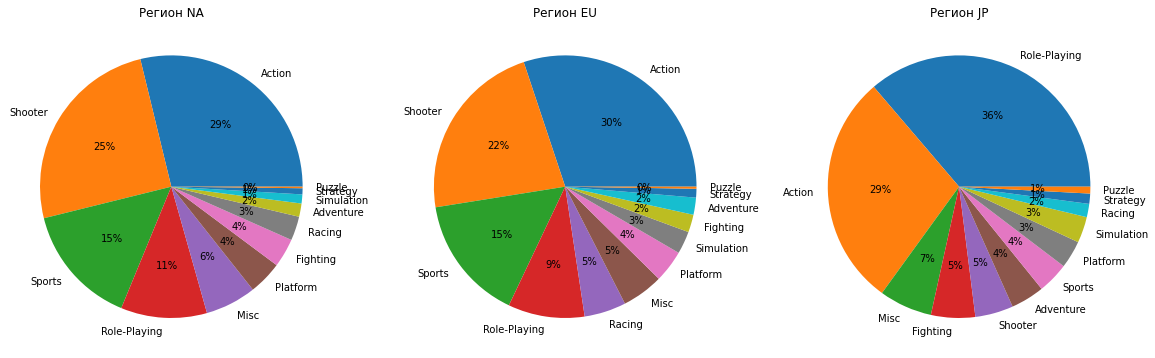

In [40]:
#сравним диаграммы по регионам, выстроив в одной строке


fig, ax = plt.subplots(1,3, figsize=(20,20))

ax[0].pie(df_na_genre['na_sales'], autopct='%1.0f%%', labels=df_na_genre.index)
ax[0].set_title('Регион NA')

ax[1].pie(df_eu_genre['eu_sales'], autopct='%1.0f%%', labels=df_eu_genre.index)
ax[1].set_title('Регион EU')

ax[2].pie(df_jp_genre['jp_sales'], autopct='%1.0f%%', labels=df_jp_genre.index)
ax[2].set_title('Регион JP')

По популярности жанров регионы NA и EU также похожи друг на друга, а регион JP отличается от них. В NA и EU самый популярный жанр - Action. В Японии первое место занимают игры жанра Role-Playing, с большим отрывом опережая игры жанра Action.

### Анализ влияния рейтинга ESRB на продажи

In [41]:
#изучим уникальные значения столбца rating

df_2013['rating'].unique()

array(['M', 'no_rating', 'E', 'T', 'E10+'], dtype=object)

Шпаргалка по значениям рейтинга: 
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «K-A» - «Everyone» до 1998 года
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [42]:
#напишем функцию, которая группирует данные продаж по показателям рейтинга


def rating_sales(series, sales, data):
    df_rating_def = data.pivot_table(index=series, values=sales,aggfunc='sum')
    df_rating_def['share,%'] = ((df_rating_def[sales] / data[sales].sum())*100).round(1)
    df_rating_def = df_rating_def.sort_values(by=sales, ascending=False)
    df_rating_plot = df_rating_def.plot(y=sales, kind='bar',figsize=(10,8), title='Влияние рейтинга на продажи в регионе')
    return df_rating_def
    return df_rating_plot
    
   
    
    

**Влияние рейтинга на продажи в регионе NA**

,na_sales,"share,%"
rating,,
M,165.21,37.7
no_rating,89.42,20.4
E,79.05,18.1
E10+,54.24,12.4
T,49.79,11.4


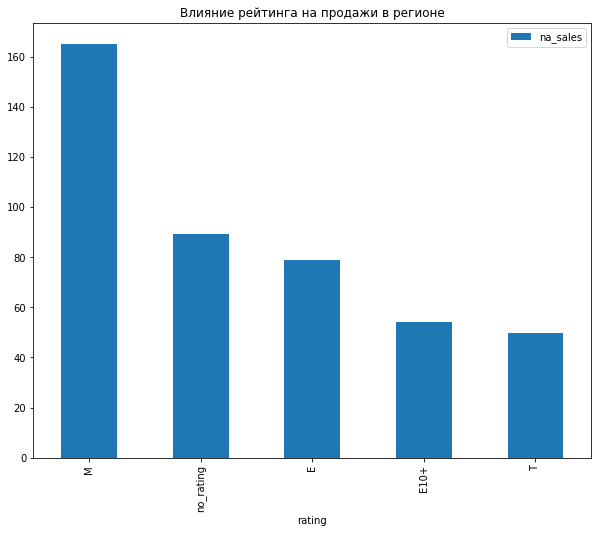

In [43]:
#рассчитаем влияние рейтинга на продажи в регионе NA c помощью функции

rating_sales('rating', 'na_sales', df_2013)


В регионе NA самыми продаваемыми являются игры с рейтингом M - «Для взрослых». На втором месте - игры без рейтинга. Далее идут игры с рейтингом E - «Для всех».

**Влияние рейтинга на продажи в регионе EU**

,eu_sales,"share,%"
rating,,
M,145.32,37.0
E,83.36,21.3
no_rating,78.91,20.1
E10+,42.69,10.9
T,41.95,10.7


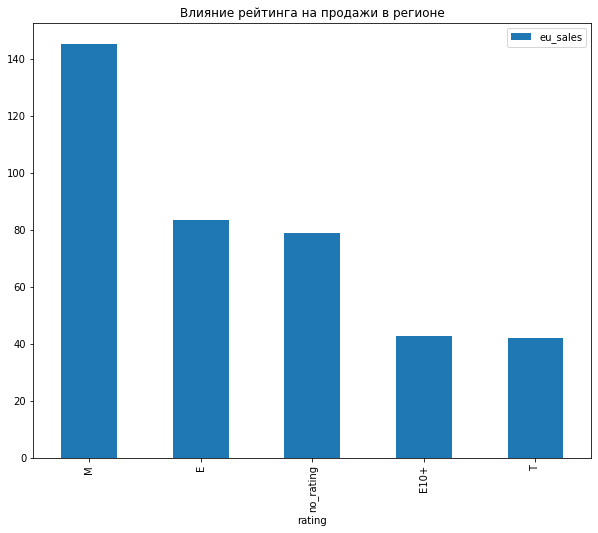

In [44]:
#рассчитаем влияние рейтинга на продажи в регионе EU c помощью функции

rating_sales('rating', 'eu_sales', df_2013)

В регионе EU самыми продаваемыми являются игры с рейтингом M - «Для взрослых». Далее идут игры с рейтигом E - «Для всех». На третьем месте по продажам - игры без рейтинга, которые собрали 20% продаж с 2013 года.

**Влияние рейтинга на продажи в регионе JP**

,jp_sales,"share,%"
rating,,
no_rating,85.05,60.4
T,20.59,14.6
E,15.14,10.8
M,14.11,10.0
E10+,5.89,4.2


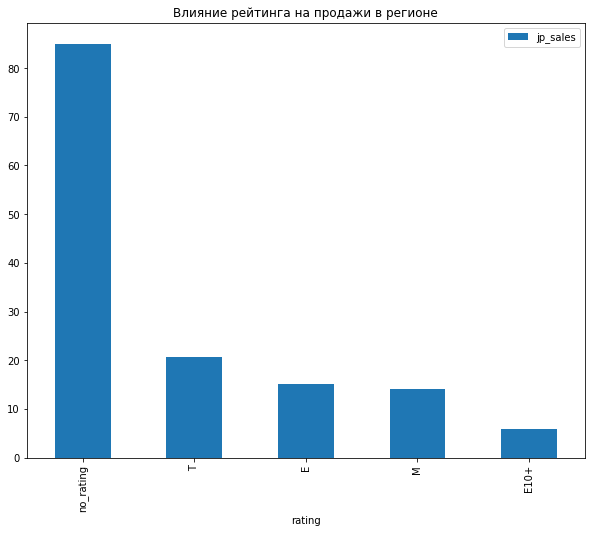

In [45]:
#рассчитаем влияние рейтинга на продажи в регионе JP c помощью функции

rating_sales('rating', 'jp_sales', df_2013)

В регионе JP 60% продаж занимают игры без рейтинга. 


14% продаж - игры с рейтингом T - «Подросткам». Далее идут игры с рейтингом E - «Для всех» и M - «Для взрослых».

## Проверка гипотез



**Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

In [46]:
#импортируем библиотеку scipy

from scipy import stats as st

In [47]:
#адаптирует датасеты для проверки гипотез

array_xone = df_2013.query('(platform == "XOne") and (user_score > 0)')
array_xone = array_xone['user_score']

array_pc = df_2013.query('(platform == "PC") and (user_score > 0)')
array_pc = array_pc['user_score']





In [48]:
#зададим уровень статистической значимости в 5%

alpha = 0.05



#рассчитаем p-value

results = st.ttest_ind(
    array_xone,
    array_pc,
    equal_var = False
)


print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC отличаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые')


0.14759594013430463
Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC одинаковые




1. Мы сформулировали нулевую гипотезу как равенство средних пользовательских оценок платформ PC и Xbox One. Альтернативная гипотеза состоит в том, что они не равны. 


2. Для проверки гипотезы мы рассчитали p-value методом t-тест и получили значение выше уровня статистической значимости в 5%. Это означает, что средние пользовательские оценки платформ Xbox One и PC одинаковые. 

**Проверка гипотезы "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"**

In [49]:
#адаптирует датасеты для проверки гипотез

array_action = df_2013.query('genre == "Action"')
array_action = array_action.dropna(subset=['user_score'])
array_action = array_action['user_score']

array_sports = df_2013.query('genre == "Sports"')
array_sports = array_sports.dropna(subset=['user_score'])
array_sports = array_sports['user_score']


In [50]:
#установим уровень статистической значимости в 5%

alpha = 0.05


#рассчитаем p-value

results = st.ttest_ind(
    array_action,
    array_sports,
    equal_var = False
)


print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports отличаются')
else:
    print('Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports одинаковые')

1.4460039700704315e-20
Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports отличаются


Опишем ход проверки гипотез: 

1. Мы сформулировали нулевую гипотезу как равенство cредних пользовательских рейтингов жанров Action и Sports. Альтернативная гипотеза состоит в том, что они не равны.


2. Для проверки гипотезы мы рассчитали p-value методом t-тест и получили значение намного ниже уровня статистической значимости в 5%. Это значит, что вероятность случайно получить имеющуюся разницу средних двух наших выборок здесь крайне низка. Средние пользовательские рейтинги жанров Action и Sports скорее всего разные.

## Общий вывод

1. На первом этапе исследования мы привели названия столбцов к нижнем регистру, избавились от строк с отсутствующими данными в тех случаях, где их удаление не влияет на общую структуру, и скорректировали типы данных. 


2. Далее мы изучили показатели продаж за весь период. Сделали вывод, что до 1990 года объем выпуска игр был стабильно низким. После 1990 года продажи стали расти и достигли пика в 2007 году. В 2008 году продажи упали - предположительно, по причине мирового финансового кризиса.  


3. Мы посмотроили график продаж по годам и выяснили, что цикл жизни одной платформы составляет 10-15 лет. 


4. Чтобы точнее проанализировать текущую рыночную конъюнктуру, мы взяли данные продаж за актуальный период с 2013 года. Мы изучили влияние оценок на продажи и выяснили, что корреляция между показателем оценки критиков и продажами - ниже среднего, а между продажами и оценками пользователей ее нет. 


5. Мы сгруппировали данные по жанрам и выяснили, cамыми продаваемыеми жанрами по медианным продажам с 2013 года являются Shooter, Sports и Platform. Наименее продаваемыми по медиане: Strategy, Puzzle и Adventure.


6. Далее мы проанализировали портрет пользователей, посмотрели самые популярные платформы и жанры по разным регионам, посмотрели продажи игр с разными рейтингом.


7. На последнем этапе мы проверили 2 гипотезы. В результате t-теста мы выяснили, что:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые, 
- средние пользовательские рейтинги жанров Action и Sports разные.


**Прогноз на 2017 год**


Самыми продаваемыми платформами в 2017 году вероятнее всего станут PS4 и XOne. Продажи игр на них стартовали в 2013 году - в 2016 году эти платформы находились в начале своего жизненного цикла и стали по итогам года самими прибыльными. Также, несмотря на нисходящий тренд, сохраняет потенциал платформа 3DS. По результатам 2016 года, она заняла третье место по продажам.


По данным анализа продаж в разных регионах, самыми перспективными в 2017 году скорее всего станут игры для следующих платформ:

- в NA - для PS4;
- в EU - для PS4;
- в JP - для 3DS.


Самыми продаваемыми жанрами в 2017 скорее всего станут:

- в NA - Action;
- в EU - Action;
- в JP - Role-Playing. 


Для успешных продаж в 2017 году у игры должен быть рейтинг:

- в NA - M, «Для взрослых»;
- в EU - M, «Для взрослых»;

Для региона JP прогноз по жанру сформулировать сложно, так как 60% продаж в этом регионе пришлись на игры, у которых не был указан рейтинг. 


